# Data Understanding
- Transaksi real estat terkadang cukup buram dan mungkin sulit bagi seorang pemula untuk mengetahui harga wajar dari rumah mana pun. Dengan demikian, beberapa situs web real estat memiliki fungsi untuk memprediksi harga rumah yang diberikan fitur berbeda terkaitnya. Model peramalan semacam itu akan membantu pembeli mengidentifikasi harga yang wajar untuk rumah tersebut dan juga memberikan wawasan kepada penjual tentang cara membangun rumah yang menghasilkan lebih banyak uang bagi mereka. Data harga jual rumah Chennai dibagikan di sini dan para peserta diharapkan membuat model prediksi harga jual yang akan membantu pelanggan menemukan harga yang wajar untuk rumah mereka dan juga membantu penjual memahami faktor apa yang menghasilkan lebih banyak uang untuk rumah.

- Informasi kolom :
  - PRT_ID : Nomor identitas rumah
  - AREA : Lokasi perumahan
  - INT_SQFT : Luas rumah (dengan ukuran persegi panjang)
  - DATE_SALE : Tanggal penjualan
  - DIST_MAINROAD : Jarak rumah dari jalan raya
  - N_BEDROOM : Jarak kamar tidur
  - N_BATHROOM : Jarak kamar mandi
  - N_ROOM : Jarak ruangan
  - SALE_COND : Kondisi Penjualan :
    - Abnormal : Kondisi penjualan dengan harga tidak sesuai pasar
    - Family : Kondisi penjualan rumah dengan kondisi bagus
    - Partial : Penjualan sebagian rumah
    - Adjland : Harga sesuai kesepakatan negosiasi
  - PARK_FACIL : Fasilitas parkir
  - DATE_BULD : Tanggal pembangunan rumah
  - BUILDTYPE : Tujuan pembangunan rumah
  - UTILITY_AVAIL : Fasilitas yang tersedia
  - STREET : Kondisi jalan diluar rumah :
    - Paved : jalan aspal
    - Gravel : jalan krikil
    - No Access : tidak ada akses jalan
  - MZZONE :
  - QS_ROOMS :
  - QS_BATHROOM :
  - QS_BEDROOM :
  - QS_OVERALL :
  - REG_FEE : Biaya administrasi setelah penjualan
  - COMMIS : Komisi setelah penjualan
  - SALES_PRICE : Harga penjualan

# Data Preparation

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

##### Membaca Data

In [196]:
df=pd.read_csv("Chennai houseing sale.csv")
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

---

# Data Wrangling

- Melihat informasi nama kolom,jumlah kolom,jumlah baris dan tipe data

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

- Mengecek Missing values

In [198]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

- Melihat nilai data dari masing-masing kolom tipe data kategorikal

In [199]:
df.select_dtypes('object')

PRT_ID        AREA   DATE_SALE    SALE_COND PARK_FACIL  DATE_BUILD  \
0     P03210  Karapakkam  04-05-2011     AbNormal        Yes  15-05-1967   
1     P09411  Anna Nagar  19-12-2006     AbNormal         No  22-12-1995   
2     P01812       Adyar  04-02-2012     AbNormal        Yes  09-02-1992   
3     P05346   Velachery  13-03-2010       Family         No  18-03-1988   
4     P06210  Karapakkam  05-10-2009     AbNormal        Yes  13-10-1979   
...      ...         ...         ...          ...        ...         ...   
7104  P03834  Karapakkam  03-01-2011      AdjLand         No  15-01-1962   
7105  P10000   Velachery  08-04-2004       Family        Yes  11-04-1995   
7106  P09594   Velachery  25-08-2006  Normal Sale         No  01-09-1978   
7107  P06508  Karapakkam  03-08-2009      Partial        Yes  11-08-1977   
7108  P09794   Velachery  13-07-2005      Partial        Yes  24-07-1961   

       BUILDTYPE UTILITY_AVAIL     STREET MZZONE  
0     Commercial        AllPub      Paved      A  
1     Commercial        AllPub     Gravel     RH  
2     Commercial           ELO     Gravel     RL  
3         Others       NoSewr       Paved      I  
4         Others        AllPub     Gravel      C  
...          ...           ...        ...    ...  
7104      Others           ELO  No Access     RM  
7105      Others        NoSeWa  No Access     RH  
7106       House        NoSeWa     Gravel      I  
7107  Commercial           ELO      Paved     RL  
7108      Others           ELO      Paved      I  

[7109 rows x 10 columns]

- Melihat data dari masing-masing kolom tipe data float

In [200]:
df.select_dtypes('float')

N_BEDROOM  N_BATHROOM  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL
0           1.0         1.0       4.0          3.9         4.9       4.330
1           2.0         1.0       4.9          4.2         2.5       3.765
2           1.0         1.0       4.1          3.8         2.2       3.090
3           3.0         2.0       4.7          3.9         3.6       4.010
4           1.0         1.0       3.0          2.5         4.1       3.290
...         ...         ...       ...          ...         ...         ...
7104        1.0         1.0       3.0          2.2         2.4       2.520
7105        3.0         2.0       3.6          4.5         3.3       3.920
7106        2.0         1.0       4.3          4.2         2.9       3.840
7107        1.0         1.0       4.6          3.8         4.1       4.160
7108        3.0         2.0       3.1          3.5         4.3       3.640

[7109 rows x 6 columns]

- Melihat data dari masing-masing kolom tipe data int

In [201]:
df.select_dtypes('int')

INT_SQFT  DIST_MAINROAD  N_ROOM  REG_FEE  COMMIS  SALES_PRICE
0         1004            131       3   380000  144400      7600000
1         1986             26       5   760122  304049     21717770
2          909             70       3   421094   92114     13159200
3         1855             14       5   356321   77042      9630290
4         1226             84       3   237000   74063      7406250
...        ...            ...     ...      ...     ...          ...
7104       598             51       2   208767  107060      5353000
7105      1897             52       5   346191  205551     10818480
7106      1614            152       4   317354  167028      8351410
7107       787             40       2   425350  119098      8507000
7108      1896            156       5   349177   79812      9976480

[7109 rows x 6 columns]

- Melihat missing values

In [202]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

#### - Review data awal :
  - Penulisan nama menggunakan huruf kapital semua
  - Total kolom 22 ada total baris 7.109
  - Tipe data tanggal penjualan dan tanggal pembangunan menggunakan tipe data string
  - Tipe data ukuran kamar mandi dan kamar tidur menggunakan tipe data float
  - Terdapat missing values N_BEDROOM (1 baris), N_BATHROOM (5 baris) dan QS_OVERALL (48 baris)

# HANDLING DATA SETELAH REVIEW :

##### Merapikan nama kolom  menjadi huruf kecil semua :

In [203]:
df.columns = df.columns.str.lower()

#### Menghapus Missing values :
- n_bedroom 1
- qs_overall 48
- n_bathroom 5
- total = 54 missing values

In [204]:
df.dropna(subset=['n_bedroom'],inplace=True)

In [205]:
df.dropna(subset=['n_bathroom'],inplace=True)

In [206]:
df.dropna(subset=['qs_overall'],inplace=True)

- Merubah tipe data n_bedroom dan n_bathroom : Perubahan tipe data ini dilakukan karena n_bedroom dan n_bathroom tidak memiliki angka decimal sehingga cukup menggunakan tipe data integer

In [207]:
df['n_bedroom'] = df['n_bedroom'].astype(int)

In [208]:
df['n_bathroom'] = df['n_bathroom'].astype(int)

- Cleaning kolom area

In [209]:
df['area'].value_counts().sum()

7056

In [210]:
def area_edit (x):
    if x == 'Chrompet':
        return 'chrompet'
    elif x == 'Karapakkam':
        return 'karapakkam'
    elif x == 'KK Nagar':
        return 'kknagar'
    elif x == 'Velachery':
        return 'velachery'
    elif x == 'Karapakkam':
        return 'karapakkam'
    elif x == 'Anna Nagar':
        return 'anna nagar'
    elif x == 'Adyar':
        return 'adyar'
    elif x == 'T Nagar':
        return 'tnagar'
    elif x == 'Chrompt':
        return 'chrompet'
    elif x == 'Chrmpet':
        return 'chrompet'
    elif x == 'TNagar':
        return 'tnagar'
    elif x == 'Chormpet':
        return 'chrompet'
    elif x == 'Karapakam':
        return 'karapakkam'
    elif x == 'Ana Nagar':
        return 'anna nagar'
    elif x == 'Velchery':
        return 'velachery'
    elif x == 'Ann Nagar':
        return 'anna nagar'
    elif x == 'Adyr':
        return 'adyar'
    elif x == 'KKNagar':
        return 'kkanagar'


In [211]:
df['area'] = df['area'].apply(area_edit)

In [212]:
df['area'].value_counts()

chrompet      1691
karapakkam    1359
kknagar        989
velachery      975
anna nagar     777
adyar          769
tnagar         495
kkanagar         1
Name: area, dtype: int64

- Cleaning kolom sale_cond

In [213]:
df['sale_cond'].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: sale_cond, dtype: int64

In [214]:
def sale_cond_edit (x):
    if x == 'AdjLand':
        return 'adjland'
    elif x == 'Normal Sale':
        return 'normal sale'
    elif x == 'AbNormal':
        return 'abnormal'
    elif x == 'Family':
        return 'family'
    elif x == 'Adj Land':
        return 'adjland'
    elif x == 'Ab Normal':
        return 'abnormal'
    elif x == 'Partiall':
        return 'partial'
    elif x == 'PartiaLl':
        return 'partial'
    elif x == 'Partial':
        return 'partial'

In [215]:
df['sale_cond'] = df['sale_cond'].apply(sale_cond_edit)

In [216]:
df['sale_cond'].value_counts()

adjland        1432
partial        1417
normal sale    1416
abnormal       1401
family         1390
Name: sale_cond, dtype: int64

- Cleaning Kolom Park Facil 

In [217]:
df['park_facil'].value_counts()

Yes    3557
No     3498
Noo       1
Name: park_facil, dtype: int64

In [218]:
def park_facil_edit (x):
    if x == 'Yes':
        return 'yes'
    elif x == 'No':
        return 'no'
    elif x == 'Noo':
        return 'no'

In [219]:
df['park_facil'] = df['park_facil'].apply(park_facil_edit)

- Cleaning Kolom buildtype

In [220]:
df['buildtype'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: buildtype, dtype: int64

In [221]:
df[['buildtype']].value_counts()

buildtype 
House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
dtype: int64

In [222]:
def buildtype_edit (x):
    if x == 'House':
        return 'house'
    elif x == 'Commercial':
        return 'comercial'
    elif x == 'Other':
        return 'other'
    elif x == 'Comercial':
        return 'comercial'
    elif x == 'Others':
        return 'other'

In [223]:
df['buildtype'] = df['buildtype'].apply(buildtype_edit)

In [224]:
df['buildtype'].value_counts()
# House 2444
# comercial 2329
# Other 2336

house        2433
other        2312
comercial    2311
Name: buildtype, dtype: int64

- Cleaning Kolom utility_avail

In [225]:
def utility_avail_edit (x):
    if x == 'AllPub':
        return 'allpub'
    elif x == 'NoSeWa':
        return 'nosewa'
    elif x == 'ELO':
        return 'elo'
    elif x == 'All Pub':
        return 'allpub'
    else:
        return 'nosewa'

In [226]:
df['utility_avail'] = df['utility_avail'].apply(utility_avail_edit)

In [227]:
df['utility_avail'].value_counts()
# NoSewa dengan noswr sama
# allpub 1887
#nosewa 3700
# ELo 1522

nosewa    3672
allpub    1875
elo       1509
Name: utility_avail, dtype: int64

In [228]:
df.select_dtypes('object')

prt_id        area   date_sale    sale_cond park_facil  date_build  \
0     P03210  karapakkam  04-05-2011     abnormal        yes  15-05-1967   
1     P09411  anna nagar  19-12-2006     abnormal         no  22-12-1995   
2     P01812       adyar  04-02-2012     abnormal        yes  09-02-1992   
3     P05346   velachery  13-03-2010       family         no  18-03-1988   
4     P06210  karapakkam  05-10-2009     abnormal        yes  13-10-1979   
...      ...         ...         ...          ...        ...         ...   
7104  P03834  karapakkam  03-01-2011      adjland         no  15-01-1962   
7105  P10000   velachery  08-04-2004       family        yes  11-04-1995   
7106  P09594   velachery  25-08-2006  normal sale         no  01-09-1978   
7107  P06508  karapakkam  03-08-2009      partial        yes  11-08-1977   
7108  P09794   velachery  13-07-2005      partial        yes  24-07-1961   

      buildtype utility_avail     street mzzone  
0     comercial        allpub      Paved      A  
1     comercial        allpub     Gravel     RH  
2     comercial           elo     Gravel     RL  
3         other        nosewa      Paved      I  
4         other        allpub     Gravel      C  
...         ...           ...        ...    ...  
7104      other           elo  No Access     RM  
7105      other        nosewa  No Access     RH  
7106      house        nosewa     Gravel      I  
7107  comercial           elo      Paved     RL  
7108      other           elo      Paved      I  

[7056 rows x 10 columns]

- Cleaning Kolom street

In [229]:
df['street'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [230]:
def street_edit (x):
    if x == 'Paved':
        return 'paved'
    elif x == 'Gravel':
        return 'gravel'
    elif x == 'No Access':
        return 'no access'
    elif x == 'Pavd':
        return 'pavd'
    elif x == 'NoAccess':
        return 'no access'

In [231]:
df['street'] = df['street'].apply(street_edit)

- Cleaning Kolom MZ

In [232]:
df['mzzone'] = df['mzzone'].str.lower()

- Mengubah waktu menjadi datetime

In [233]:
# Correcting Date columnd from object to daterime format
df['date_sale'] = pd.to_datetime(df['date_sale'], format='%d-%m-%Y')
df['date_build'] = pd.to_datetime(df['date_build'], format='%d-%m-%Y')

- Membuat Kolom properti

In [234]:
# df['property_age'] = pd.DatetimeIndex(df['date_sale']).year - pd.DatetimeIndex(df['date_build']).year

Hapus kolom prt_id karena tidak digunakan

In [235]:
df.drop(columns='prt_id',inplace=True)

In [236]:
df.isna().sum()

area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
reg_fee          0
commis           0
sales_price      0
dtype: int64

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           7056 non-null   object        
 1   int_sqft       7056 non-null   int64         
 2   date_sale      7056 non-null   datetime64[ns]
 3   dist_mainroad  7056 non-null   int64         
 4   n_bedroom      7056 non-null   int32         
 5   n_bathroom     7056 non-null   int32         
 6   n_room         7056 non-null   int64         
 7   sale_cond      7056 non-null   object        
 8   park_facil     7056 non-null   object        
 9   date_build     7056 non-null   datetime64[ns]
 10  buildtype      7056 non-null   object        
 11  utility_avail  7056 non-null   object        
 12  street         7056 non-null   object        
 13  mzzone         7056 non-null   object        
 14  qs_rooms       7056 non-null   float64       
 15  qs_bathroom    7056 n

- Data awal 7.109
  - Namun ada data yang jumlah barisnya 7.108 yaitu n_bathroom
- Data missing values di hapus 54
- total akhir harusnya 7.155, namun karena ada 1 baris yang berbeda jumlah datanya. jadi total akhirnya 7.056

-----------------------------------------------------------------------------------------------------Data Wrangling Selesai------------------------------------------------------------------------------------------------------

In [238]:
# Membuat index baru
df = df.reset_index()

In [239]:
# Menghapus index lama
df = df.drop(columns='index')

# Mengecek Korelasi Numerikal Sebelum Encoding Data Categorikal

- Mengecek distribusi terlebih dahulu

In [240]:
df.select_dtypes('int')

int_sqft  dist_mainroad  n_bedroom  n_bathroom  n_room  reg_fee  commis  \
0         1004            131          1           1       3   380000  144400   
1         1986             26          2           1       5   760122  304049   
2          909             70          1           1       3   421094   92114   
3         1855             14          3           2       5   356321   77042   
4         1226             84          1           1       3   237000   74063   
...        ...            ...        ...         ...     ...      ...     ...   
7051       598             51          1           1       2   208767  107060   
7052      1897             52          3           2       5   346191  205551   
7053      1614            152          2           1       4   317354  167028   
7054       787             40          1           1       2   425350  119098   
7055      1896            156          3           2       5   349177   79812   

      sales_price  
0         7600000  
1        21717770  
2        13159200  
3         9630290  
4         7406250  
...           ...  
7051      5353000  
7052     10818480  
7053      8351410  
7054      8507000  
7055      9976480  

[7056 rows x 8 columns]

- Mengecek Outlier

In [241]:
# Mengecek outliers
def rumus_outlier(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)

    iqr = q3 - q1

    lower_outlier = q1 - (iqr * 1.5)
    upper_outlier = q3 + (iqr * 1.5)

    outliers = x[(x < lower_outlier) | (x > upper_outlier)]
    return outliers

In [242]:
cek_ouliers = {}
for num_feature in df.select_dtypes(['float','int']):
    outliers = rumus_outlier(df[num_feature])
    if len(outliers):
        print(f"-> {num_feature} memiliki {len(outliers)} outlier")
        cek_ouliers[num_feature] = outliers
    else:
        print(f"-> {num_feature} tidak memilik outlier.")
        cek_ouliers[num_feature] = None

-> int_sqft tidak memilik outlier.
-> dist_mainroad tidak memilik outlier.
-> n_bedroom memiliki 253 outlier
-> n_bathroom memiliki 1504 outlier
-> n_room memiliki 253 outlier
-> qs_rooms tidak memilik outlier.
-> qs_bathroom tidak memilik outlier.
-> qs_bedroom tidak memilik outlier.
-> qs_overall tidak memilik outlier.
-> reg_fee memiliki 229 outlier
-> commis memiliki 181 outlier
-> sales_price memiliki 227 outlier


- Mengecek Korealasi antar kolom numerikal

<AxesSubplot:>

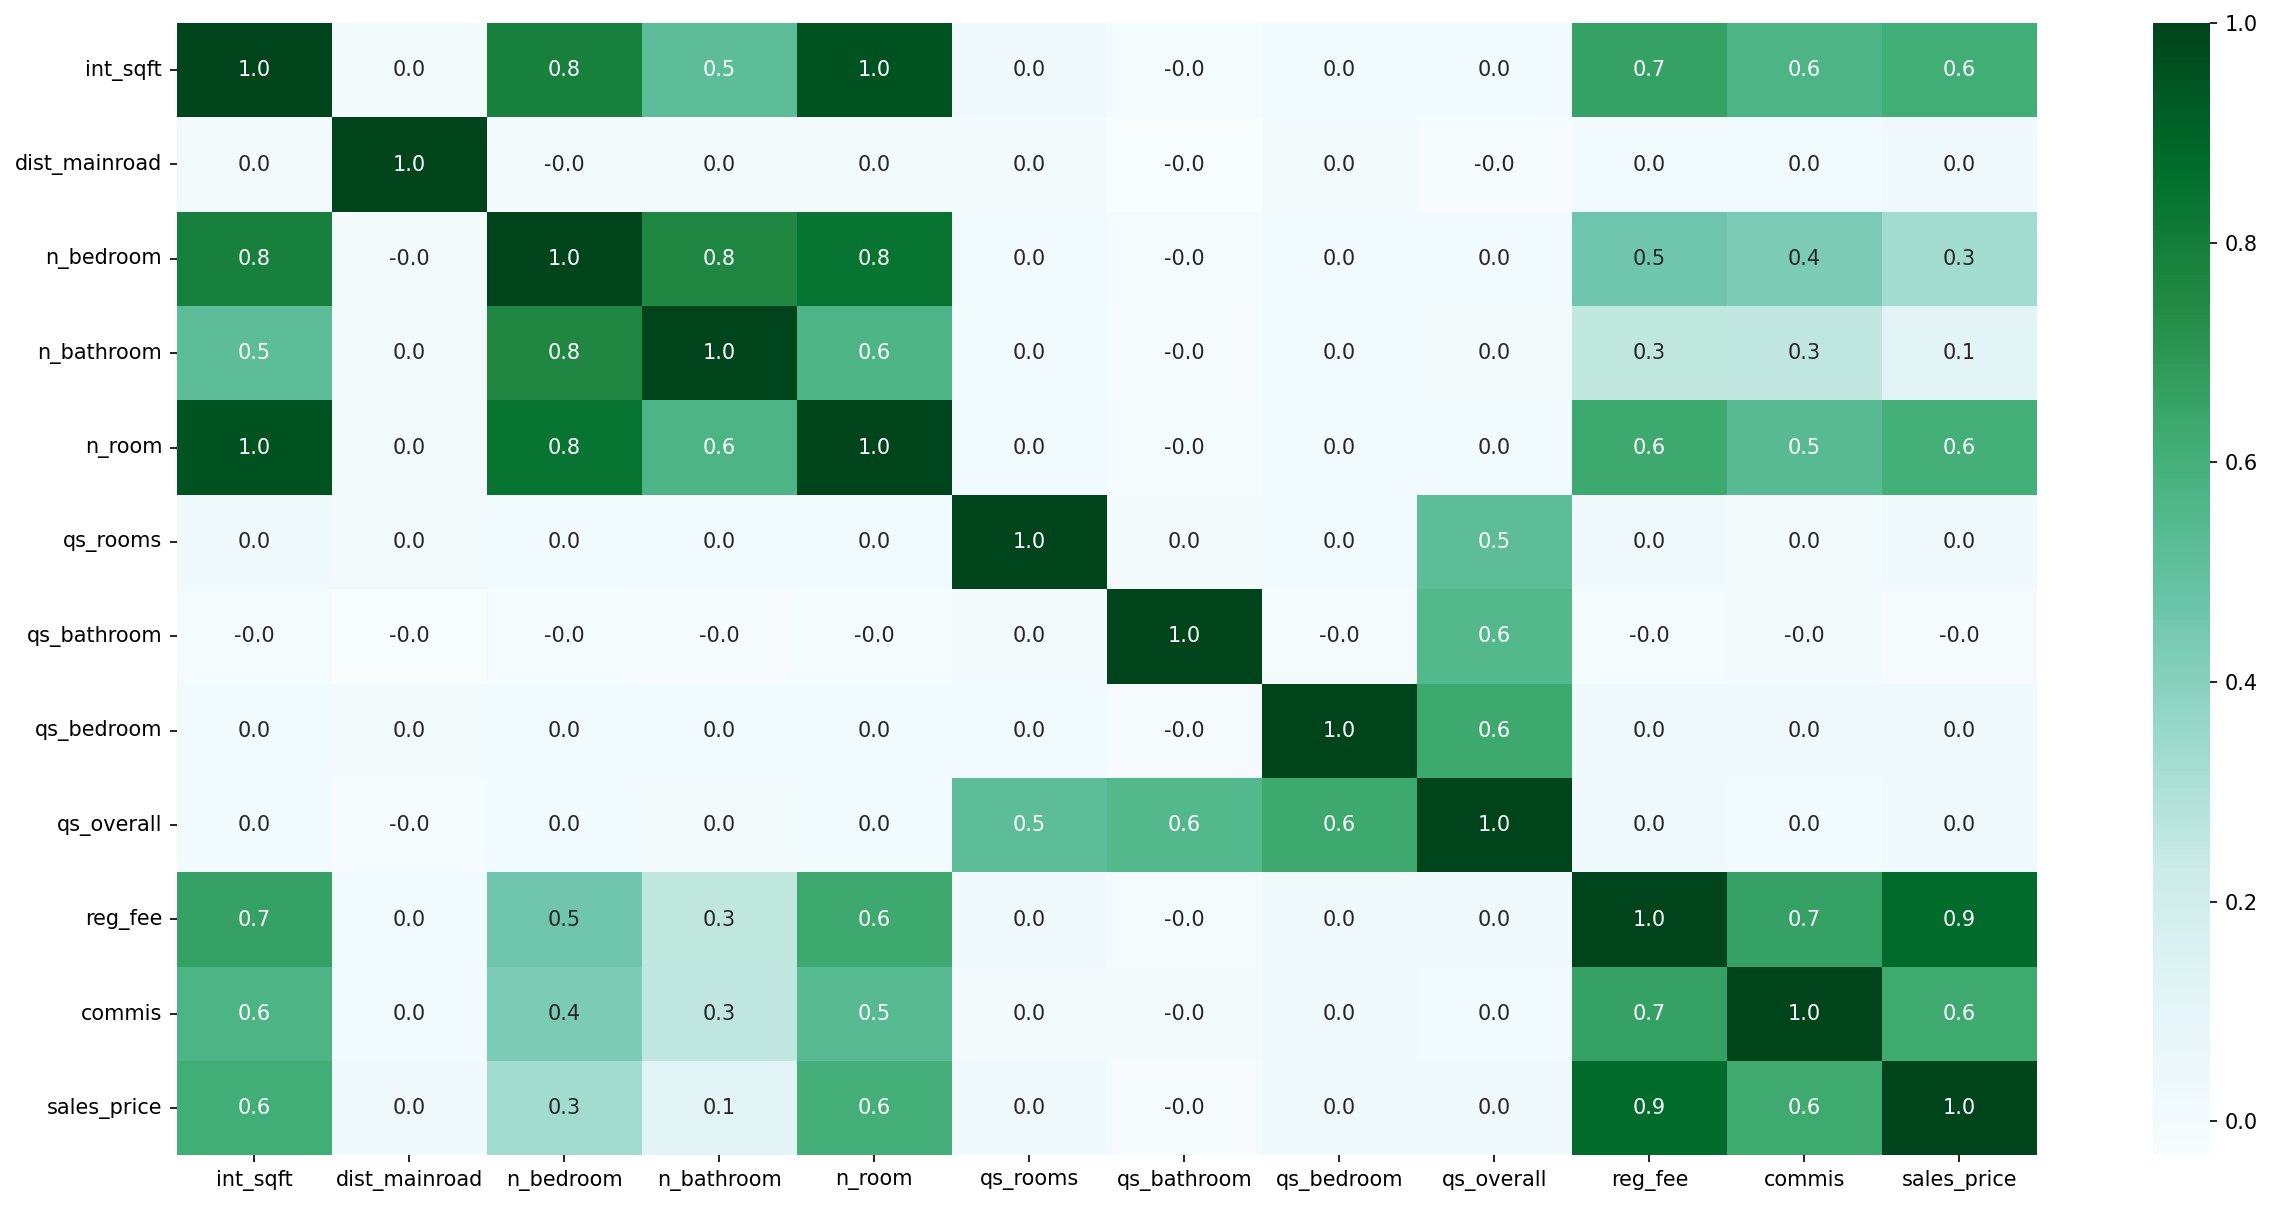

In [243]:
plt.figure(figsize=(20,10), dpi=150)
sns.heatmap(df.corr(method='pearson'),cbar=True, cmap='BuGn',annot=True,fmt='.1f')

---

# FEATURE ENGINERING

In [244]:
df = pd.get_dummies(df, columns=['buildtype', 'area', 'sale_cond', 'utility_avail', 'street', 'mzzone'])

- Label Encoding Kolom park_facil 

In [245]:
df['park_facil'].value_counts()

yes    3557
no     3499
Name: park_facil, dtype: int64

In [246]:
def park_facil_encode (x):
    if x == 'yes':
        return 1
    elif x == 'no':
        return 2

In [247]:
### Mengaplikasikan Update-an Label Encoding
df['park_facil'] = df['park_facil'].apply(park_facil_encode)

In [248]:
### Mengecek Update-an Label Encoding
df['park_facil'].value_counts()

1    3557
2    3499
Name: park_facil, dtype: int64

In [249]:
df

int_sqft  date_sale  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0         1004 2011-05-04            131          1           1       3   
1         1986 2006-12-19             26          2           1       5   
2          909 2012-02-04             70          1           1       3   
3         1855 2010-03-13             14          3           2       5   
4         1226 2009-10-05             84          1           1       3   
...        ...        ...            ...        ...         ...     ...   
7051       598 2011-01-03             51          1           1       2   
7052      1897 2004-04-08             52          3           2       5   
7053      1614 2006-08-25            152          2           1       4   
7054       787 2009-08-03             40          1           1       2   
7055      1896 2005-07-13            156          3           2       5   

      park_facil date_build  qs_rooms  qs_bathroom  ...  street_gravel  \
0              1 1967-05-15       4.0          3.9  ...              0   
1              2 1995-12-22       4.9          4.2  ...              1   
2              1 1992-02-09       4.1          3.8  ...              1   
3              2 1988-03-18       4.7          3.9  ...              0   
4              1 1979-10-13       3.0          2.5  ...              1   
...          ...        ...       ...          ...  ...            ...   
7051           2 1962-01-15       3.0          2.2  ...              0   
7052           1 1995-04-11       3.6          4.5  ...              0   
7053           2 1978-09-01       4.3          4.2  ...              1   
7054           1 1977-08-11       4.6          3.8  ...              0   
7055           1 1961-07-24       3.1          3.5  ...              0   

      street_no access  street_pavd  street_paved  mzzone_a  mzzone_c  \
0                    0            0             1         1         0   
1                    0            0             0         0         0   
2                    0            0             0         0         0   
3                    0            0             1         0         0   
4                    0            0             0         0         1   
...                ...          ...           ...       ...       ...   
7051                 1            0             0         0         0   
7052                 1            0             0         0         0   
7053                 0            0             0         0         0   
7054                 0            0             1         0         0   
7055                 0            0             1         0         0   

      mzzone_i  mzzone_rh  mzzone_rl  mzzone_rm  
0            0          0          0          0  
1            0          1          0          0  
2            0          0          1          0  
3            1          0          0          0  
4            0          0          0          0  
...        ...        ...        ...        ...  
7051         0          0          0          1  
7052         0          1          0          0  
7053         1          0          0          0  
7054         0          0          1          0  
7055         1          0          0          0  

[7056 rows x 44 columns]

- Label Encoding Kolom utility_avail 

### Sementara di hapus nanti di bikin encode tanggal


In [250]:
df.insert(3,'year', df['date_sale'].dt.year)

In [251]:
df.insert(4,'month', df['date_sale'].dt.year)

In [252]:
df.insert(5,'day', df['date_sale'].dt.year)

In [253]:
df.drop(columns='date_sale',inplace=True)

In [254]:
df.drop(columns='date_build',inplace=True)

--------------------------------------------------------------------------------Feature Enginering Selesai-------------------------------------------------------------------------------

# Mengecek Korelasi Numerikal Setelah Encoding Data Categorikal

Memeriksa korelasi setelah encoding data categorikal

<AxesSubplot:>

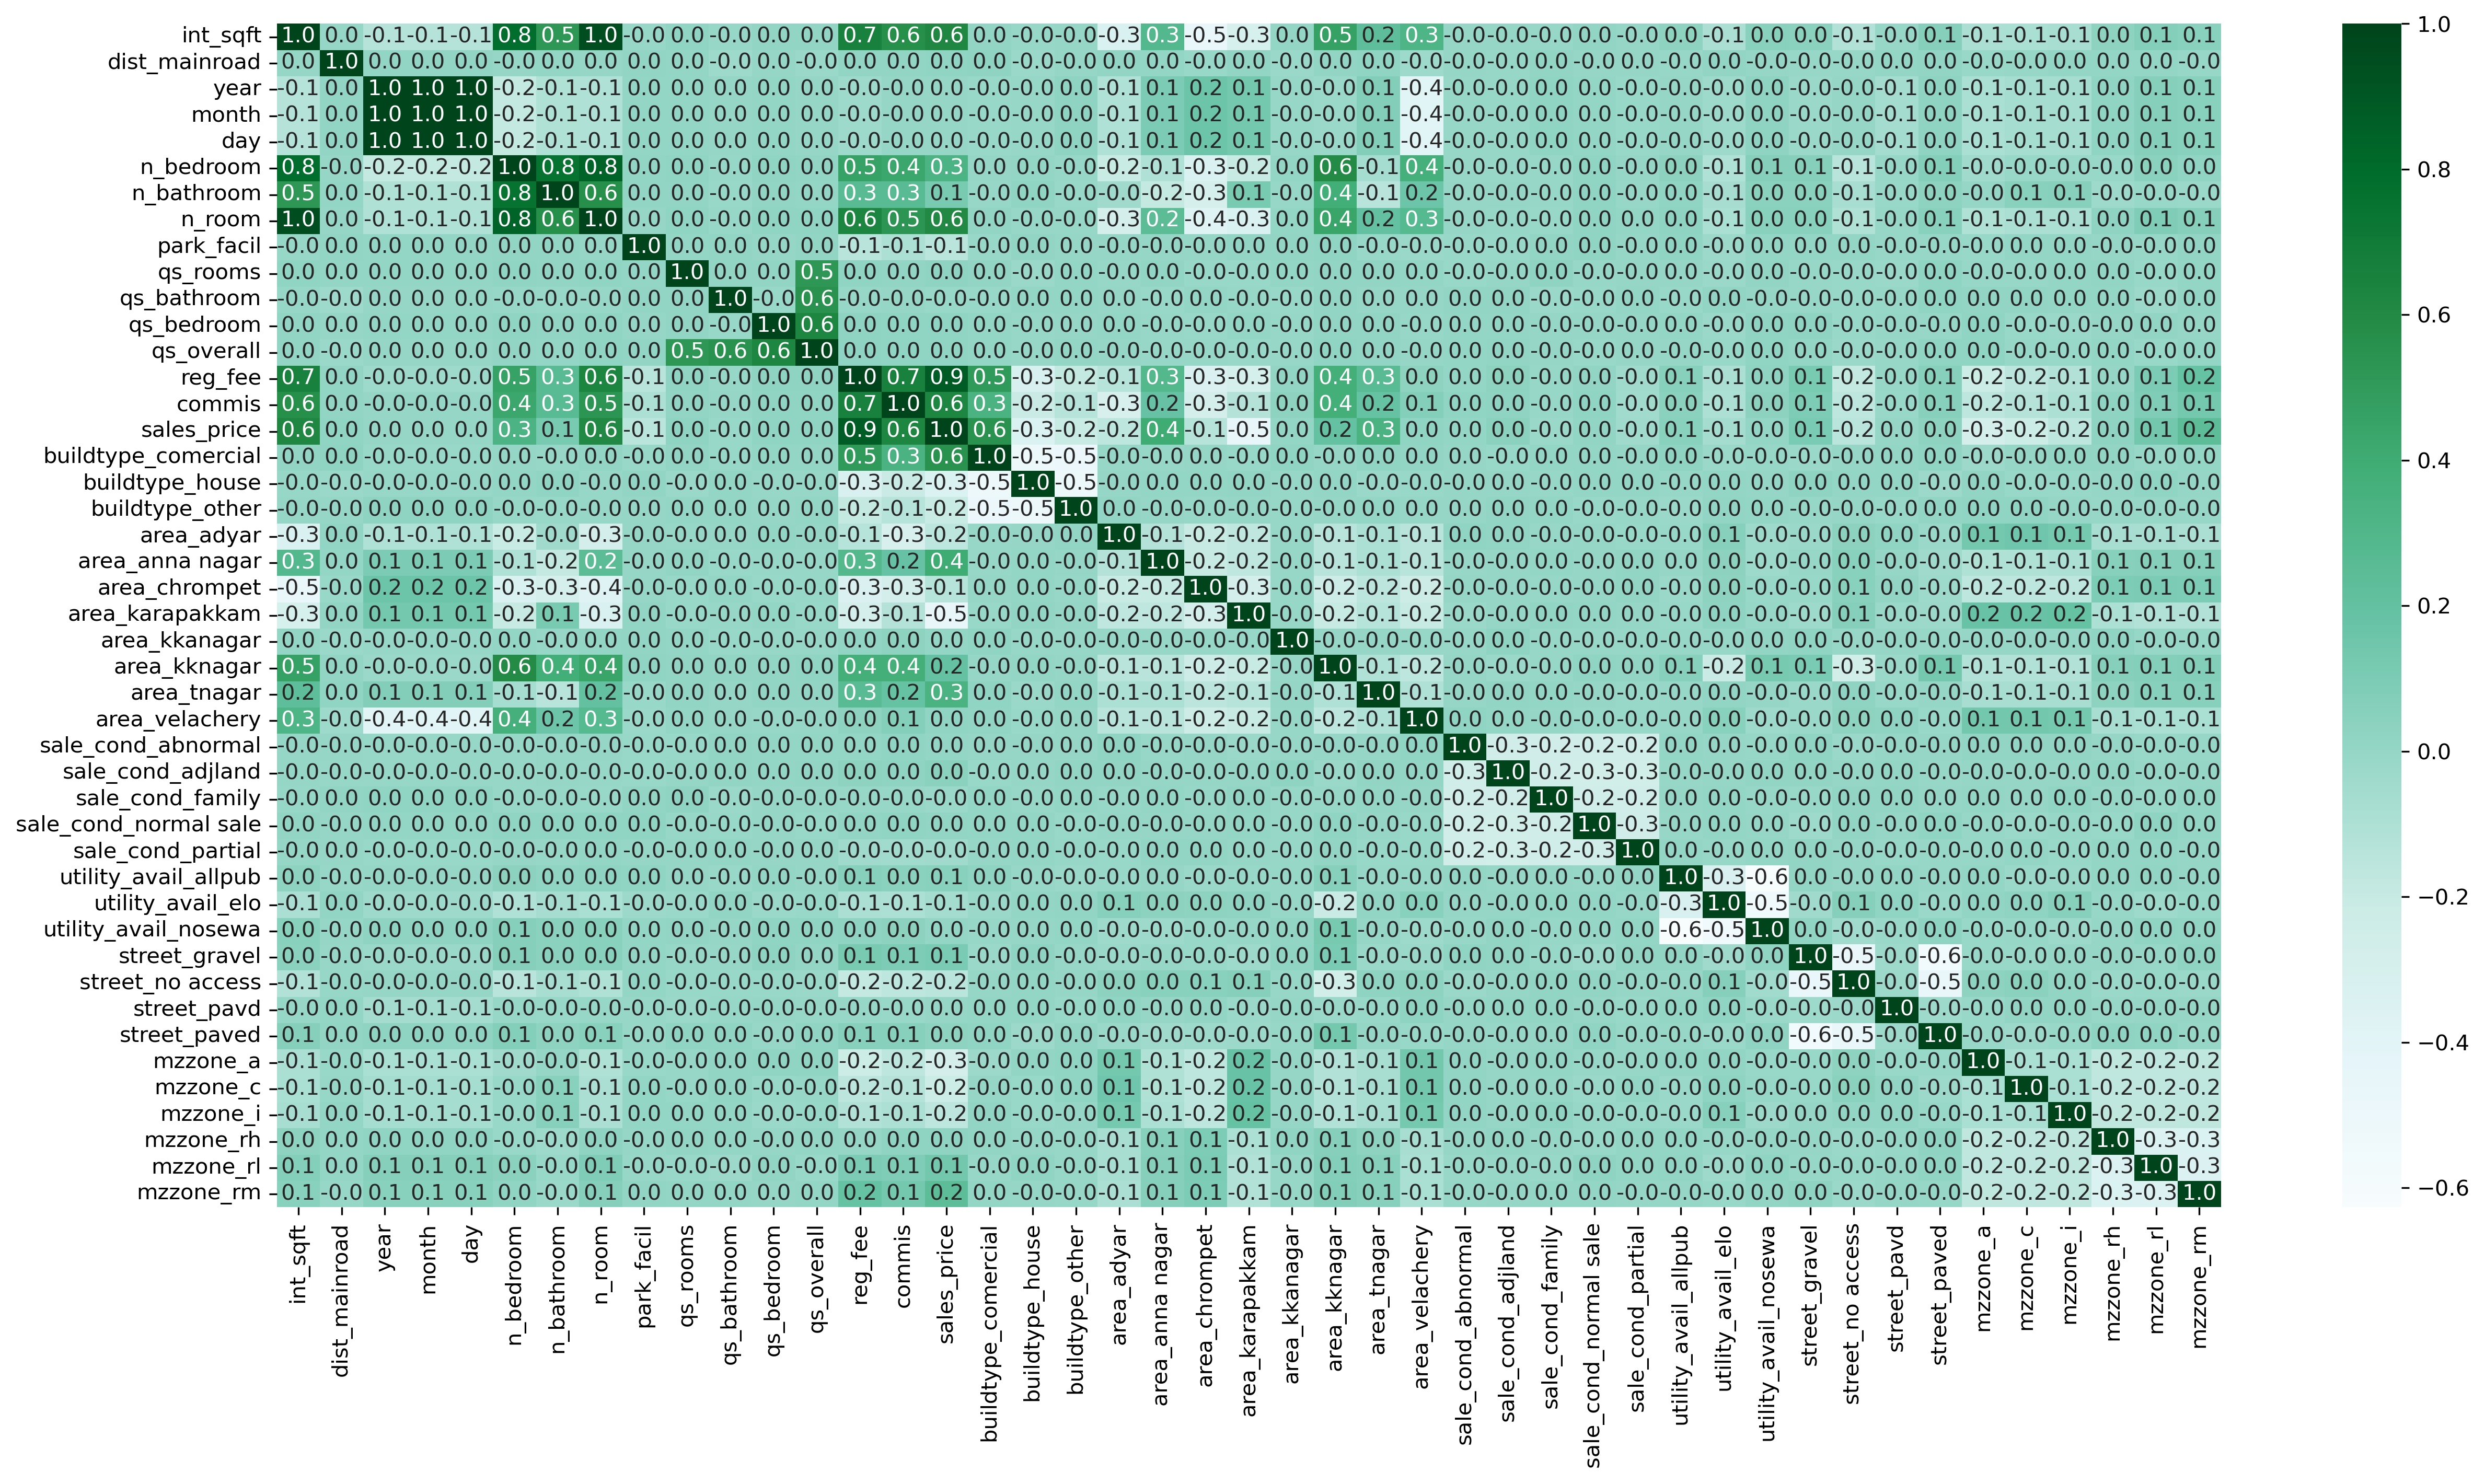

In [255]:
plt.figure(figsize=(20,10), dpi=300)
sns.heatmap(df.corr(method='pearson'),cbar=True, cmap='BuGn',annot=True,fmt='.1f')

In [256]:
# Menghapus kolom yang memiliki korelasi rendah
df.drop(columns=['day','month','year','dist_mainroad','n_bedroom','n_bathroom','park_facil','qs_rooms','qs_bathroom','qs_bedroom','qs_overall'],inplace=True)

<AxesSubplot:>

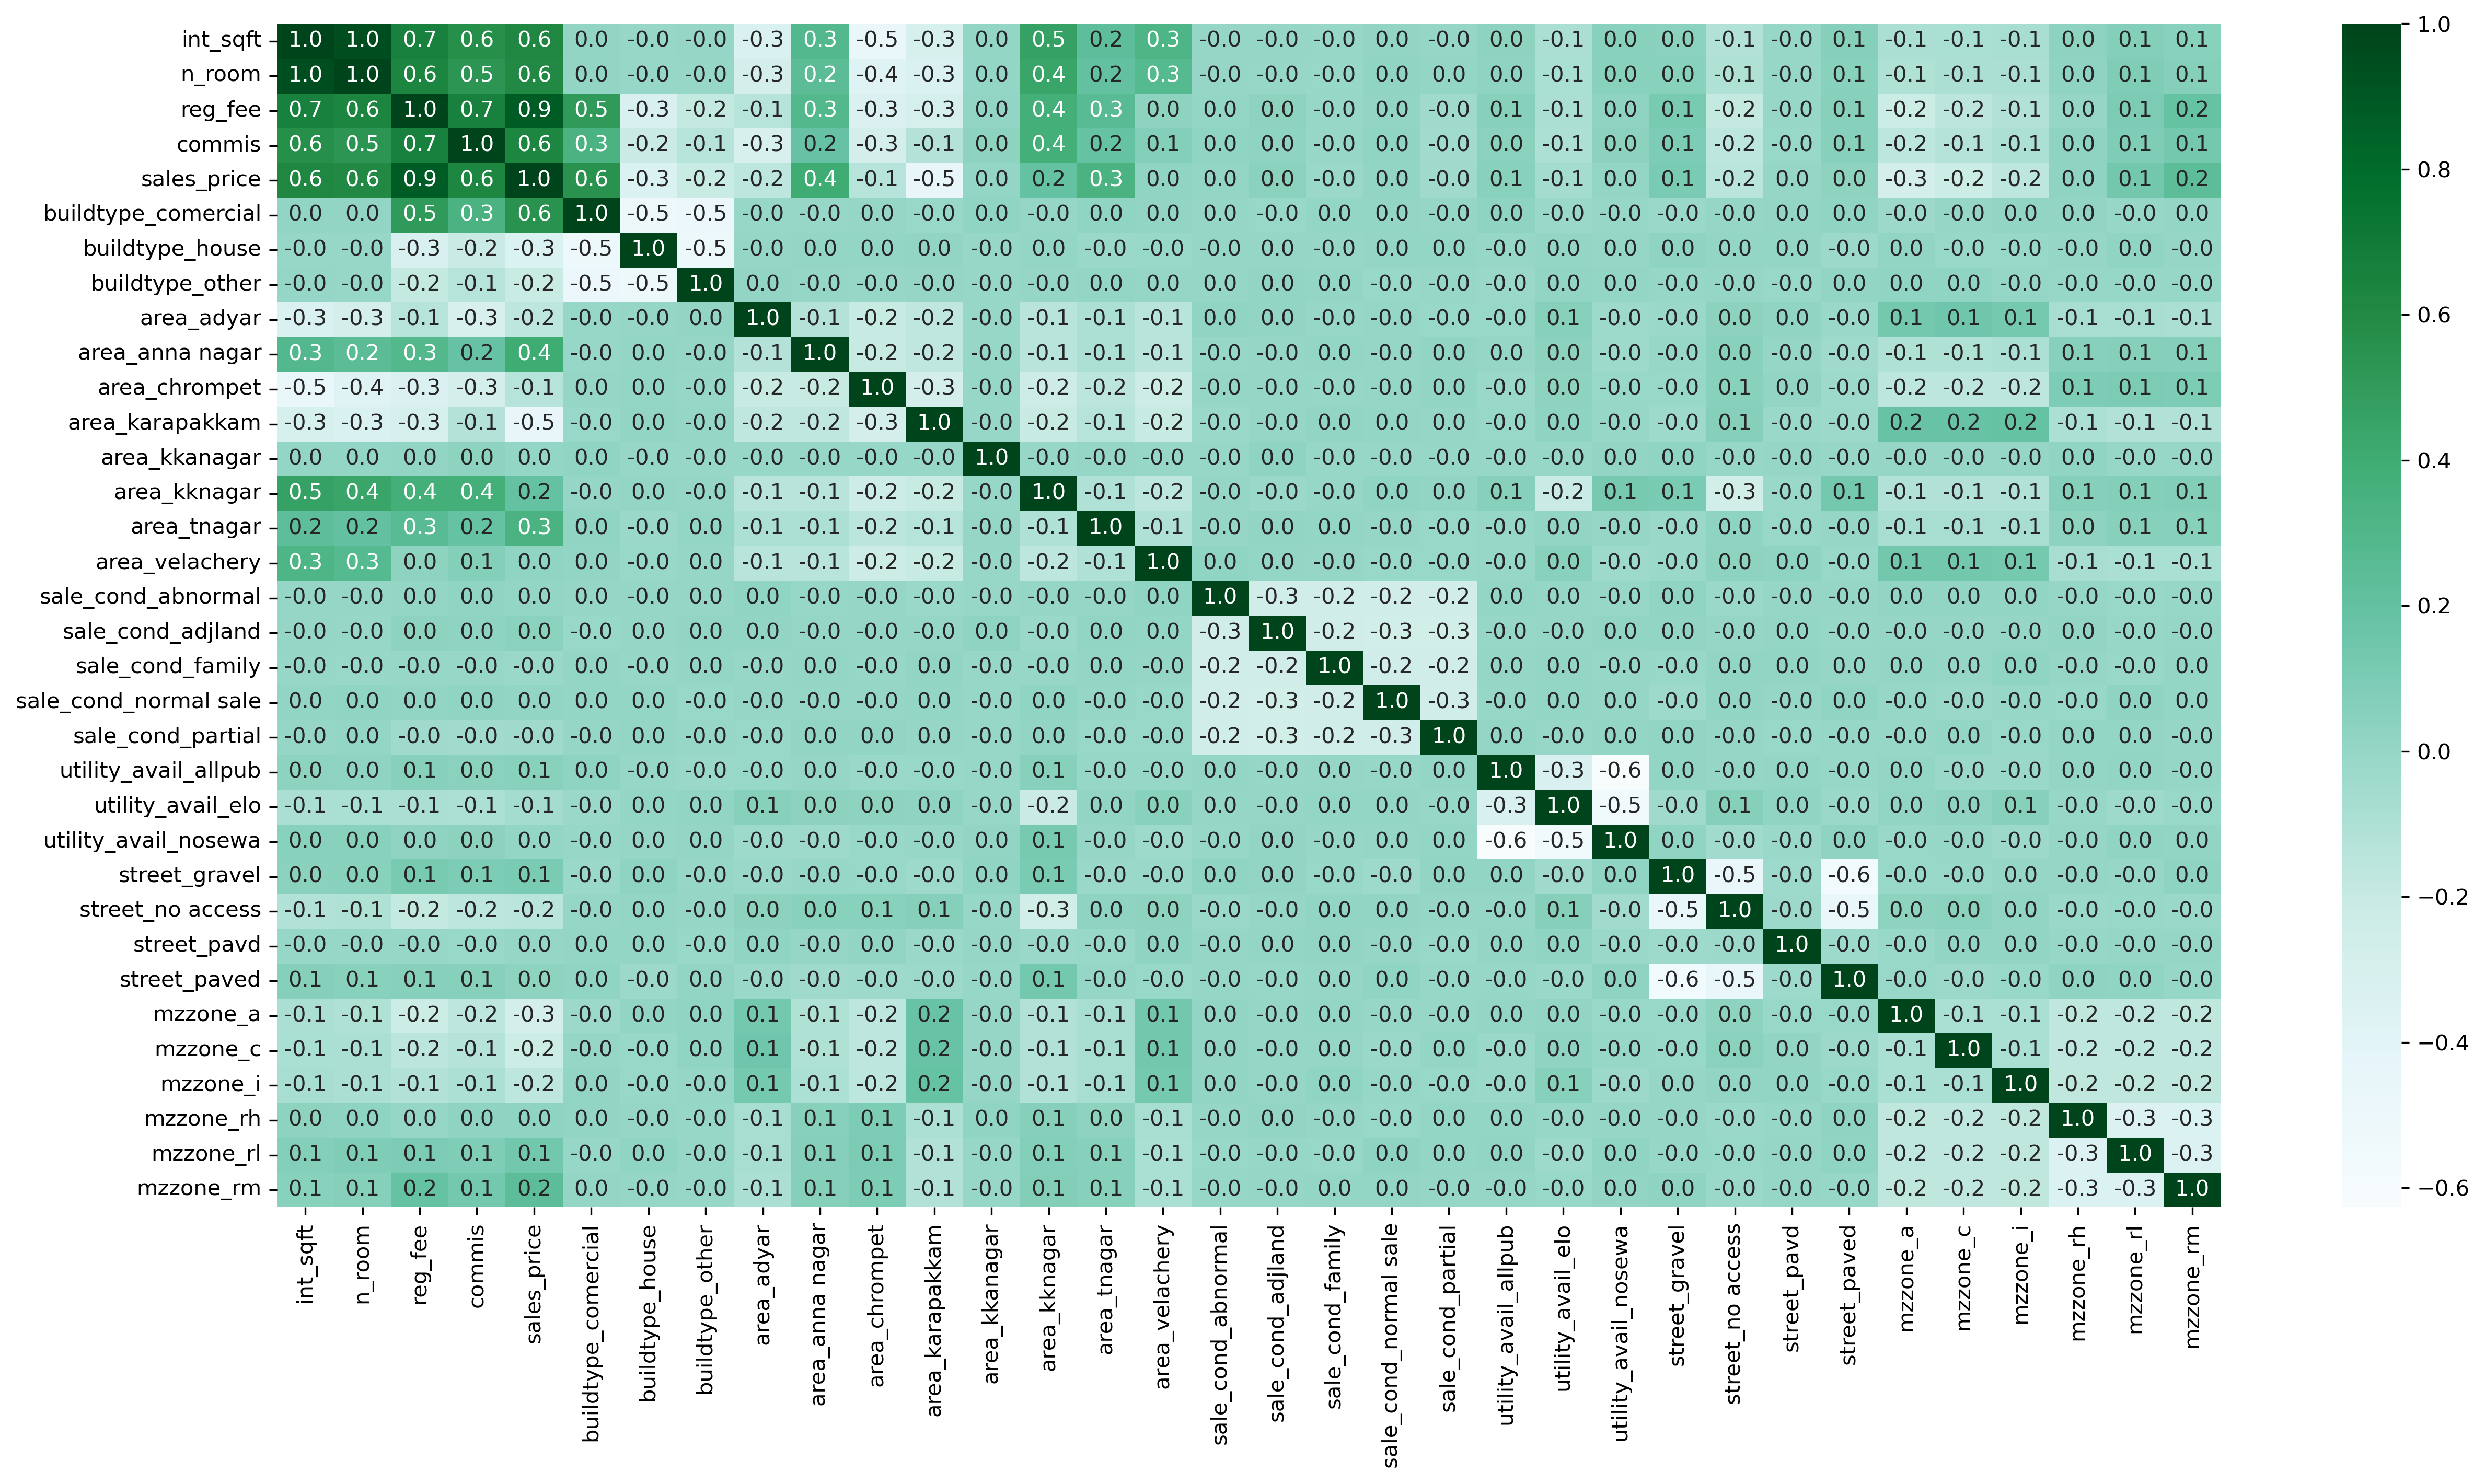

In [257]:
plt.figure(figsize=(20,10), dpi=300)
sns.heatmap(df.corr(method='pearson'),cbar=True, cmap='BuGn',annot=True,fmt='.1f')

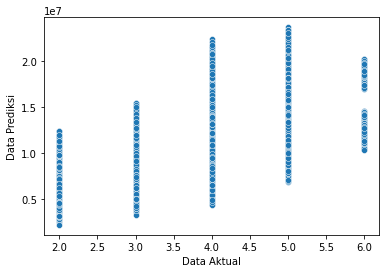

In [258]:
sns.scatterplot(df['n_room'],df['sales_price'])
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.show()

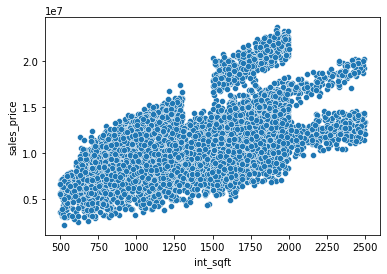

In [259]:
sns.scatterplot(df['int_sqft'], df['sales_price'])
plt.show()

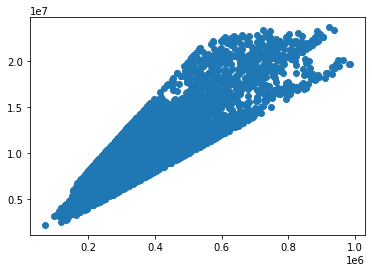

In [260]:
plt.scatter(df['reg_fee'],df['sales_price'])

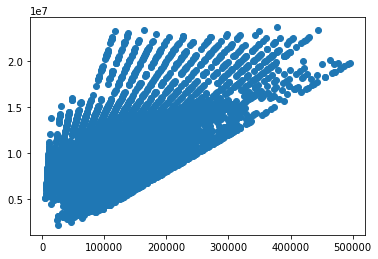

In [261]:
plt.scatter(df['commis'],df['sales_price'])

# MACHINE LEARNING

#### Splitting Dataset

In [262]:
X = df.drop(columns=['sales_price'],axis=1)
y = df['sales_price']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .15, random_state = 8)

In [264]:
Model = LinearRegression(fit_intercept=True) #gada konstanta

- Linear Regression

In [265]:
Model.fit(X_train, y_train)

LinearRegression()

In [266]:
Model.score(X_train, y_train)

0.9544028941642261

In [267]:
Model.score(X_test, y_test)

0.9580083656290226

In [268]:
Model.intercept_

3061410.3966301717

In [269]:
Model.coef_

array([ 2.54034645e+03,  1.62217705e+05,  7.91552412e+00,  2.54681053e+00,
        1.98236187e+06, -1.22892856e+06, -7.53433313e+05,  5.83535095e+05,
        2.00338162e+06,  7.60758069e+05, -1.54979632e+06, -1.99986335e+06,
       -1.34196748e+06,  2.14276503e+06, -5.98812661e+05, -1.01958149e+04,
        2.72123868e+05, -1.13869587e+05,  2.51856300e+04, -1.73244096e+05,
        1.14351406e+05, -8.28837540e+04, -3.14676517e+04,  3.68717267e+05,
       -4.31119302e+05,  3.05386361e+04,  3.18633992e+04, -9.81246571e+05,
       -6.28289801e+05, -1.90518059e+05,  1.70365194e+05,  6.07989771e+05,
        1.02169947e+06])

In [270]:
pd.DataFrame(data = Model.coef_, index = X_train.columns, columns=['Coef'])

Coef
int_sqft               2.540346e+03
n_room                 1.622177e+05
reg_fee                7.915524e+00
commis                 2.546811e+00
buildtype_comercial    1.982362e+06
buildtype_house       -1.228929e+06
buildtype_other       -7.534333e+05
area_adyar             5.835351e+05
area_anna nagar        2.003382e+06
area_chrompet          7.607581e+05
area_karapakkam       -1.549796e+06
area_kkanagar         -1.999863e+06
area_kknagar          -1.341967e+06
area_tnagar            2.142765e+06
area_velachery        -5.988127e+05
sale_cond_abnormal    -1.019581e+04
sale_cond_adjland      2.721239e+05
sale_cond_family      -1.138696e+05
sale_cond_normal sale  2.518563e+04
sale_cond_partial     -1.732441e+05
utility_avail_allpub   1.143514e+05
utility_avail_elo     -8.288375e+04
utility_avail_nosewa  -3.146765e+04
street_gravel          3.687173e+05
street_no access      -4.311193e+05
street_pavd            3.053864e+04
street_paved           3.186340e+04
mzzone_a              -9.812466e+05
mzzone_c              -6.282898e+05
mzzone_i              -1.905181e+05
mzzone_rh              1.703652e+05
mzzone_rl              6.079898e+05
mzzone_rm              1.021699e+06

In [271]:
pred_train = Model.predict(X_train)

In [272]:
pred_test = Model.predict(X_test)

In [273]:
Training_set = pd.concat([X_train, y_train], axis=1)

In [274]:
Testing_set = pd.concat([X_test, y_test], axis=1)

In [275]:
Training_set['price_pred'] = pred_train

In [276]:
Training_set

int_sqft  n_room  reg_fee  commis  buildtype_comercial  buildtype_house  \
4836      1149       3   344866   73900                    1                0   
6775      1645       4   309688   80289                    0                1   
2024       958       3   321585  218678                    1                0   
5649      1815       5   804292  148159                    1                0   
1016      1673       4   797727  341883                    1                0   
...        ...     ...      ...     ...                  ...              ...   
2181      1631       4   392056  171525                    0                0   
2409      1816       5   360969  227277                    0                0   
2033      1841       5   296135  197423                    0                1   
1364      1161       3   296434  127043                    0                0   
4547      1759       4   376055  175493                    0                0   

      buildtype_other  area_adyar  area_anna nagar  area_chrompet  ...  \
4836                0           0                0              1  ...   
6775                0           0                0              0  ...   
2024                0           0                0              1  ...   
5649                0           0                0              0  ...   
1016                0           0                0              0  ...   
...               ...         ...              ...            ...  ...   
2181                1           0                1              0  ...   
2409                1           0                1              0  ...   
2033                0           0                0              0  ...   
1364                1           0                0              1  ...   
4547                1           0                0              0  ...   

      street_pavd  street_paved  mzzone_a  mzzone_c  mzzone_i  mzzone_rh  \
4836            0             0         0         0         0          0   
6775            0             0         0         0         0          1   
2024            0             0         0         0         0          0   
5649            0             1         0         0         0          0   
1016            0             0         0         0         0          0   
...           ...           ...       ...       ...       ...        ...   
2181            0             0         0         0         0          1   
2409            0             0         0         0         0          1   
2033            0             0         0         0         0          0   
1364            0             1         0         0         0          0   
4547            0             0         0         0         0          0   

      mzzone_rl  mzzone_rm  sales_price    price_pred  
4836          1          0     12316650  1.224602e+07  
6775          0          0     11469920  1.199161e+07  
2024          0          1     12863400  1.227252e+07  
5649          1          0     21165570  1.995027e+07  
1016          0          1     16280140  1.741689e+07  
...         ...        ...          ...           ...  
2181          0          0     12251750  1.228987e+07  
2409          0          0     13369230  1.365200e+07  
2033          1          0      9871170  1.034835e+07  
1364          0          1     10586920  1.003152e+07  
4547          0          1     12535180  1.089787e+07  

[5997 rows x 35 columns]

#### Latihan Linear Regression

In [277]:
pred_train = Model.predict(X_train) 

In [278]:
r2_train = r2_score(y_train, pred_train)
r2_train

0.9544028941642261

In [279]:
MAE_train = mean_absolute_error(y_train, pred_train)
MAE_train

626264.966727142

In [280]:
MSE_train = mean_squared_error(y_train, pred_train)
MSE_train

639814537366.3627

In [281]:
RMSE_train = np.sqrt(MSE_train)
RMSE_train

799884.077455204

In [282]:
print("Hasil Evaluation Matrix untuk Data Training")
print("=" * 50)
print("Nilai R Squared : ", r2_train.round(2))
print("Nilai MAE : ", MAE_train.round(2))
print("Nilai MSE : ", MSE_train.round(2))
print("Nilai RMSE : ", RMSE_train.round(2))

Hasil Evaluation Matrix untuk Data Training
Nilai R Squared :  0.95
Nilai MAE :  626264.97
Nilai MSE :  639814537366.36
Nilai RMSE :  799884.08


#### Test Linear Regression

In [283]:
pred_test = Model.predict(X_test)

In [284]:
r2_test = r2_score(y_test, pred_test)
r2_test

0.9580083656290226

In [285]:
MAE_test = mean_absolute_error(y_test, pred_test)
MAE_test

620101.4381964721

In [286]:
MSE_test = mean_squared_error(y_test, pred_test)
MSE_test

637327526136.4408

In [287]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

798327.9565043685

In [288]:
print("Hasil Evaluation Matrix untuk Data Test")
print("=" * 50)
print("Nilai R Squared : ", r2_test.round(2))
print("Nilai MAE : ", MAE_test.round(2))
print("Nilai MSE : ", MSE_test.round(2))
print("Nilai RMSE : ", RMSE_test.round(2))

Hasil Evaluation Matrix untuk Data Test
Nilai R Squared :  0.96
Nilai MAE :  620101.44
Nilai MSE :  637327526136.44
Nilai RMSE :  798327.96


In [289]:
data = {
    "Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "Testing" : [r2_test, MAE_test, MSE_test, RMSE_test]
}

In [290]:
pd.DataFrame(data, index=["R Squared", "MAE", "MSE", "RMSE"])

Training       Testing
R Squared  9.544029e-01  9.580084e-01
MAE        6.262650e+05  6.201014e+05
MSE        6.398145e+11  6.373275e+11
RMSE       7.998841e+05  7.983280e+05

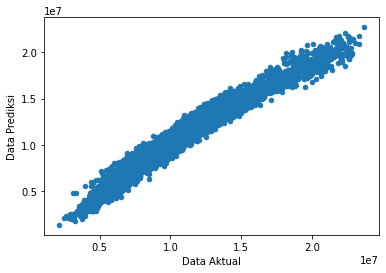

In [291]:
plt.scatter(y_train, pred_train, s=20)
plt.xlabel("Data Aktual")
plt.ylabel("Data Prediksi")
plt.show()

## Improvement Machine Learning - Polynomial Features

In [292]:
X = df.drop(columns='sales_price')
y = df['sales_price']

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, random_state=42)

In [294]:
Poli = PolynomialFeatures(degree=2, include_bias=False, interaction_only = True)

In [295]:
Poli = Poli.fit(X_train)

In [296]:
X_trainPoli = Poli.transform(X_train)
X_testPoli = Poli.transform(X_test)

In [297]:
# Poli = Poli.fit(X_train)

In [298]:
df_XtrainPoli = pd.DataFrame(X_trainPoli)
df_XtrainPoli.head()

0    1         2         3    4    5    6    7    8    9    ...  551  \
0  1587.0  4.0  262786.0  145992.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
1  1266.0  3.0  247133.0   71539.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
2   816.0  3.0  320259.0  150122.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   
3  1142.0  3.0  261706.0   30197.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0   
4  1238.0  4.0  329415.0   10626.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0   

   552  553  554  555  556  557  558  559  560  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 561 columns]

In [299]:
df_XtestPoli = pd.DataFrame(X_testPoli)
df_XtestPoli.head()

0    1         2         3    4    5    6    7    8    9    ...  551  \
0  1971.0  5.0  591269.0  186717.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1  1751.0  4.0  333365.0   86030.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
2  1911.0  5.0  388088.0   80294.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0   
3  1497.0  4.0  269441.0  146968.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
4  1071.0  3.0  228192.0  178275.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   

   552  553  554  555  556  557  558  559  560  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 561 columns]

In [300]:
Model_PF = LinearRegression()

In [301]:
Model_PF.fit(df_XtrainPoli, y_train)

LinearRegression()

In [302]:
PF_train = Model_PF.predict(df_XtrainPoli)
PF_test = Model_PF.predict(df_XtestPoli)

#### Evaluation Matrix Comparison

##### Train Polynomial

In [303]:
r2_PF = r2_score(y_train, PF_train) ## R2 dari prediksi Polynomial Features
r2_PF

0.9842751325008039

In [304]:
MAE_PF = mean_absolute_error(y_train, PF_train)
MAE_PF

394354.6923966075

In [305]:
MSE_PF = mean_squared_error(y_train, PF_train)
MSE_PF

220788258564.74826

In [306]:
RMSE_PF = np.sqrt(MSE_PF)
RMSE_PF

469881.1110959327

#### Test Polynomial

In [307]:
r2_PF_test = r2_score(y_test, PF_test) ## R2 dari prediksi Polynomial Features
r2_PF_test

0.9820978846685303

In [308]:
MAE_PF_test = mean_absolute_error(y_test, PF_test)
MAE_PF_test

428685.50738915167

In [309]:
MSE_PF_test = mean_squared_error(y_test, PF_test)
MSE_PF_test

265515268144.20566

In [310]:
RMSE_PF_test = np.sqrt(MSE_PF_test)
RMSE_PF_test

515281.7366685973

In [311]:
eva_data = {
    "LinReg Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "LinReg Testing" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test]
}
pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])

LinReg Training  LinReg Testing  Polynomial Training  Polynomial Testing
R2       9.544029e-01    9.580084e-01         9.842751e-01        9.820979e-01
MAE      6.262650e+05    6.201014e+05         3.943547e+05        4.286855e+05
MSE      6.398145e+11    6.373275e+11         2.207883e+11        2.655153e+11
RMSE     7.998841e+05    7.983280e+05         4.698811e+05        5.152817e+05

#### Algoritma RIDGE

In [312]:
Model_R = Ridge()

In [313]:
Model_R.fit(df_XtrainPoli, y_train)

Ridge()

- Train Ridge

In [314]:
R_train = Model_R.predict(df_XtrainPoli)
R_test = Model_R.predict(df_XtestPoli)

In [315]:
r2_R = r2_score(y_train, R_train) ## R2 dari prediksi Polynomial Features
r2_R

0.9842705567785673

In [316]:
MAE_R = mean_absolute_error(y_train, R_train)
MAE_R

394550.81809002714

In [317]:
MSE_R = mean_squared_error(y_train, R_train)
MSE_R

220852504940.39005

In [318]:
RMSE_R = np.sqrt(MSE_R)
RMSE_R

469949.47062465135

- Test Ridge

In [319]:
r2_R_test = r2_score(y_test, R_test) ## R2 dari prediksi Polynomial Features
r2_R_test

0.9821492825118506

In [320]:
MAE_R_test = mean_absolute_error(y_test, R_test)
MAE_R_test

428240.89125419245

In [321]:
MSE_R_test = mean_squared_error(y_test, R_test)
MSE_R_test

264752960902.93527

In [322]:
RMSE_R_test = np.sqrt(MSE_R_test)
RMSE_R_test

514541.5055201429

In [323]:
eva_data = {
    "LinReg Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "LinReg Testing" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test],
    'Ridge Training' : [r2_R, MAE_R, MSE_R, RMSE_R],
    'Ridge Testing' : [r2_R_test, MAE_R_test, MSE_R_test, RMSE_R_test]
}
pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE'])

LinReg Training  LinReg Testing  Polynomial Training  \
R2       9.544029e-01    9.580084e-01         9.842751e-01   
MAE      6.262650e+05    6.201014e+05         3.943547e+05   
MSE      6.398145e+11    6.373275e+11         2.207883e+11   
RMSE     7.998841e+05    7.983280e+05         4.698811e+05   

      Polynomial Testing  Ridge Training  Ridge Testing  
R2          9.820979e-01    9.842706e-01   9.821493e-01  
MAE         4.286855e+05    3.945508e+05   4.282409e+05  
MSE         2.655153e+11    2.208525e+11   2.647530e+11  
RMSE        5.152817e+05    4.699495e+05   5.145415e+05

### Algoritma LASSO

In [324]:
model_l = Lasso()

In [325]:
model_l.fit(df_XtrainPoli, y_train)

Lasso()

- TRAINING LASSO

In [326]:
L_train = model_l.predict(df_XtrainPoli)
L_test = model_l.predict(df_XtestPoli)

In [327]:
r2_L = r2_score(y_train, L_train) ## R2 dari prediksi Polynomial Features
r2_L

0.9842675536015003

In [328]:
MAE_L = mean_absolute_error(y_train, L_train)
MAE_L

394499.5300808744

In [329]:
MSE_L = mean_squared_error(y_train, L_train)
MSE_L

220894671669.92383

In [330]:
MSE_L_test = mean_squared_error(y_test, L_test)
MSE_L_test

265863251206.95526

In [331]:
RMSE_L = np.sqrt(MSE_L)
RMSE_L

469994.33152956626

- TEST LASSO

In [332]:
r2_L_test = r2_score(y_test, L_test) ## R2 dari prediksi Polynomial Features
r2_L_test

0.9820744222403005

In [333]:
MAE_L_test = mean_absolute_error(y_test, L_test)
MAE_L_test

429033.66328219953

In [334]:
RMSE_L_test = np.sqrt(MSE_L_test)
RMSE_L_test

515619.28901754174

In [335]:
eva_data = {
    "LinReg Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "LinReg Testing" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test],
    'Ridge Training' : [r2_R, MAE_R, MSE_R, RMSE_R],
    'Ridge Testing' : [r2_R_test, MAE_R_test, MSE_R_test, RMSE_R_test],
    'Lasso Training' : [r2_L, MAE_L, MSE_L, RMSE_L],
    'Lasso Testing' : [r2_L_test, MAE_L_test, MSE_L_test, RMSE_L_test]
}

In [336]:
seluruh_kolom = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE']).round(2)
seluruh_kolom.T

R2        MAE           MSE       RMSE
LinReg Training      0.95  626264.97  6.398145e+11  799884.08
LinReg Testing       0.96  620101.44  6.373275e+11  798327.96
Polynomial Training  0.98  394354.69  2.207883e+11  469881.11
Polynomial Testing   0.98  428685.51  2.655153e+11  515281.74
Ridge Training       0.98  394550.82  2.208525e+11  469949.47
Ridge Testing        0.98  428240.89  2.647530e+11  514541.51
Lasso Training       0.98  394499.53  2.208947e+11  469994.33
Lasso Testing        0.98  429033.66  2.658633e+11  515619.29

# ALgoritmat ElasticNet

In [337]:
model_e = ElasticNet()

In [338]:
model_e.fit(df_XtrainPoli, y_train)

ElasticNet()

In [339]:
E_train = model_e.predict(df_XtrainPoli)
E_test = model_e.predict(df_XtestPoli)

- TRAINING ELASTICNET

In [340]:
r2_E = r2_score(y_train, E_train) ## R2 dari prediksi Polynomial Features
r2_E

0.9777109020565244

In [341]:
MAE_E = mean_absolute_error(y_train, E_train)
MAE_E

458759.79871704604

In [342]:
MSE_E = mean_squared_error(y_train, E_train)
MSE_E

312954695495.56757

In [343]:
RMSE_E = np.sqrt(MSE_E)
RMSE_E

559423.5385605146

- TEST ELASTICNET 

In [344]:
r2_E_test = r2_score(y_test, E_test) ## R2 dari prediksi Polynomial Features
r2_E_test

0.9770969471327592

In [345]:
MAE_E_test = mean_absolute_error(y_test, E_test) ## R2 dari prediksi Polynomial Features
MAE_E_test

472423.0517633647

In [346]:
MSE_E_test = mean_squared_error(y_test, E_test)
MSE_E_test

339686685666.4991

In [347]:
RMSE_E_test = np.sqrt(MSE_E_test)
RMSE_E_test

582826.4627369789

In [348]:
eva_data = {
    "LinReg Training" : [r2_train, MAE_train, MSE_train, RMSE_train],
    "LinReg Testing" : [r2_test, MAE_test, MSE_test, RMSE_test],
    'Polynomial Training' : [r2_PF, MAE_PF, MSE_PF, RMSE_PF],
    'Polynomial Testing' : [r2_PF_test, MAE_PF_test, MSE_PF_test, RMSE_PF_test],
    'Ridge Training' : [r2_R, MAE_R, MSE_R, RMSE_R],
    'Ridge Testing' : [r2_R_test, MAE_R_test, MSE_R_test, RMSE_R_test],
    'Lasso Training' : [r2_L, MAE_L, MSE_L, RMSE_L],
    'Lasso Testing' : [r2_L_test, MAE_L_test, MSE_L_test, RMSE_L_test],
    'Elast Training' : [r2_E, MAE_E, MSE_E, RMSE_E],
    'Elast Testing' : [r2_E_test, MAE_E_test, MSE_E_test, RMSE_E_test]
}

In [349]:
seluruh_kolom_final = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE']).round(2)
seluruh_kolom_final.T

R2        MAE           MSE       RMSE
LinReg Training      0.95  626264.97  6.398145e+11  799884.08
LinReg Testing       0.96  620101.44  6.373275e+11  798327.96
Polynomial Training  0.98  394354.69  2.207883e+11  469881.11
Polynomial Testing   0.98  428685.51  2.655153e+11  515281.74
Ridge Training       0.98  394550.82  2.208525e+11  469949.47
Ridge Testing        0.98  428240.89  2.647530e+11  514541.51
Lasso Training       0.98  394499.53  2.208947e+11  469994.33
Lasso Testing        0.98  429033.66  2.658633e+11  515619.29
Elast Training       0.98  458759.80  3.129547e+11  559423.54
Elast Testing        0.98  472423.05  3.396867e+11  582826.46

---

---

---

# MENCARI NILAI VALUE UNTUK TUNNING

### Ridge Manual Tuning

- Proses Mencari nilai-value dari Hyper Parameter agar mendapat hasil evaluation matrix terbaik

#### Mengecek anga paling tinggi untuk tuning

In [350]:
param_a = [0.001, 0.01, 1,2,3, 10, 50, 100]
# alpa = 0,3,0.01 pakai np.arage 

In [351]:
## Eva Matrix yang digunakan = R2
train_r = []
test_r = []

for i in param_a: # Melooping nilai dari pram_a
    model_R = Ridge(alpha=i) # Define model dengan nilai Alpha sesuai nilai i
    model_R.fit(df_XtrainPoli, y_train) # Training Model
    y_pred_tr = model_R.predict(df_XtrainPoli) # Model Predict data Training
    R2_train = r2_score(y_train, y_pred_tr) ## Evaluation Matrix Data Training
    train_r.append(R2_train) ## Memasukkan Hasil Eva Matrix Data Training ke Training List
    y_pred_ts = model_R.predict(df_XtestPoli) # Model Predict data Testing
    R2_test = r2_score(y_test, y_pred_ts) ## Evaluation Matrix Data Testing
    test_r.append(R2_test) ## Memasukkan Hasil Eva Matrix Data Testing ke Testing List

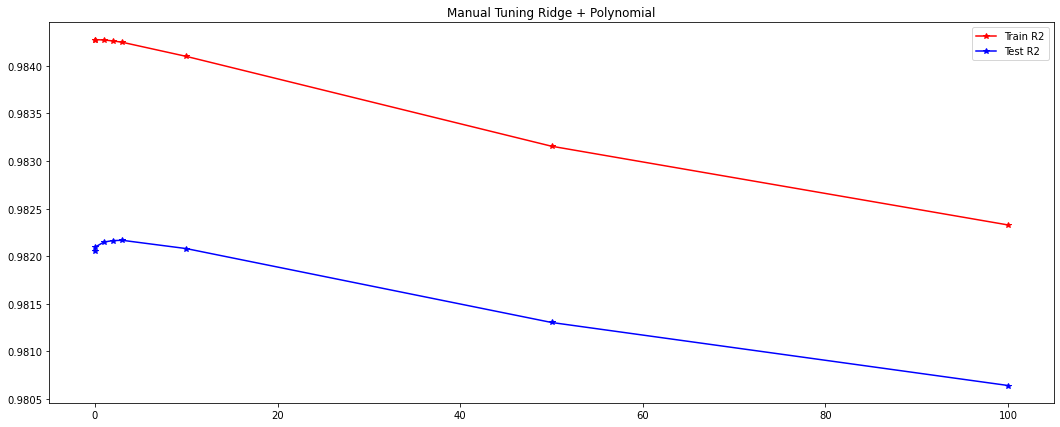

In [352]:
plt.figure(figsize=(18,7))
plt.plot(param_a, train_r, 'r*-')
plt.plot(param_a, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Polynomial")
plt.show()

In [353]:
# melihat hasil test r
test_r

[0.9820560687799713,
 0.982095251184465,
 0.9821492825118506,
 0.9821640512041825,
 0.9821666963848833,
 0.9820798355666963,
 0.9813037915342246,
 0.9806417216544965]

In [354]:
# melihat paling tinggi nilai dari test ridge
np.max(test_r)

0.9821666963848833

In [355]:
# Melihat pada index keberapa paling tinggi 
np.argmax(test_r)

4

In [356]:
# index ke berapa letak nilai tertinggi
param_a[1]

0.01

In [357]:
# nilai tertinggi dari baris index
param_a[np.argmax(test_r)]

3

- MULAI TUNING MANUAL
  - Tunning Untuk Ridge

In [358]:
Alpha = np.arange(0, 5, 0.001)

In [359]:
def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []
    
    for i in Alpha:
        model_R = Model(alpha=i)
        model_R.fit(X_train, y_train)
        y_pred_tr = model_R.predict(X_train)
        R2_train = r2_score(y_train, y_pred_tr)
        train_r.append(R2_train)
        y_pred_ts = model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_ts)
        test_r.append(R2_test)
    return train_r, test_r

In [360]:
train_Ridge, test_Ridge = Manual_Tune(Alpha, df_XtrainPoli, df_XtestPoli, y_train, y_test, Ridge)

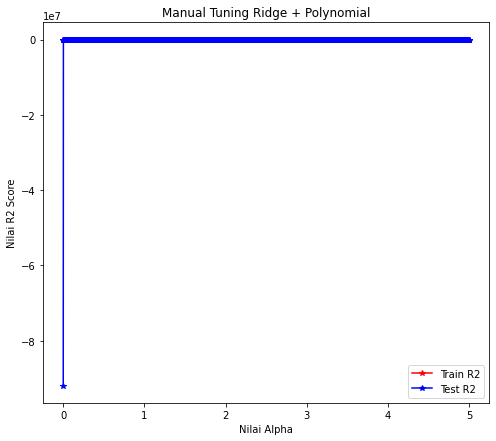

In [361]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Ridge, 'r*-')
plt.plot(Alpha, test_Ridge, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Ridge + Polynomial")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

In [362]:
# melihat hasil test r
np.max(test_Ridge)

0.9821668002126556

In [363]:
# Melihat pada index keberapa paling tinggi 
Alpha[np.argmax(test_Ridge)]

2.824

### TUNING LASSO

- Tuning Lasso pakai parameter

In [364]:
param_al = [0.001, 0.01, 1,2,3, 10, 50, 100]

In [365]:
## Eva Matrix yang digunakan = R2
train_l = []
test_l = []

for i in param_a: # Melooping nilai dari pram_a
    model_l = Lasso(alpha=i) # Define model dengan nilai Alpha sesuai nilai i
    model_l.fit(df_XtrainPoli, y_train) # Training Model
    y_pred_tr = model_l.predict(df_XtrainPoli) # Model Predict data Training
    R2_train = r2_score(y_train, y_pred_tr) ## Evaluation Matrix Data Training
    train_l.append(R2_train) ## Memasukkan Hasil Eva Matrix Data Training ke Training List
    y_pred_ts = model_l.predict(df_XtestPoli) # Model Predict data Testing
    R2_test = r2_score(y_test, y_pred_ts) ## Evaluation Matrix Data Testing
    test_l.append(R2_test) ## Memasukkan Hasil Eva Matrix Data Testing ke Testing List

In [366]:
# melihat hasil test r
test_l

[0.9817347949518058,
 0.9817584748117358,
 0.9820744222403005,
 0.9821152280277831,
 0.9821043866183126,
 0.9821109348363672,
 0.982211879878138,
 0.9822660134236433]

In [367]:
# melihat paling tinggi nilai dari test ridge
np.max(test_l)

0.9822660134236433

In [368]:
# Melihat pada index keberapa paling tinggi 
np.argmax(test_l)

7

In [369]:
# index ke berapa letak nilai tertinggi
param_a[1]

0.01

In [370]:
# nilai tertinggi dari baris index
param_a[np.argmax(test_l)]

100

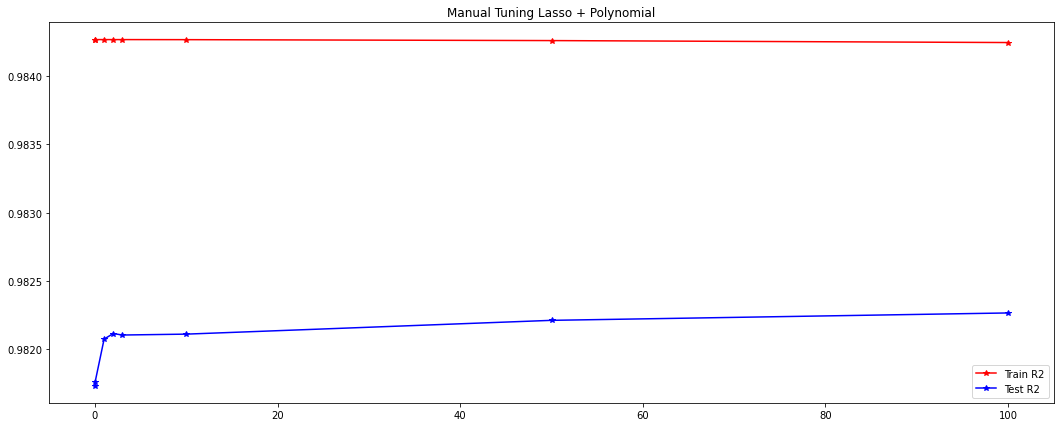

In [371]:
plt.figure(figsize=(18,7))
plt.plot(param_al, train_l, 'r*-')
plt.plot(param_al, test_l, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Polynomial")
plt.show()

- Tunning Lasso pakai Alpha

In [372]:
train_Lasso, test_Lasso = Manual_Tune(Alpha, df_XtrainPoli, df_XtestPoli, y_train, y_test, Lasso)

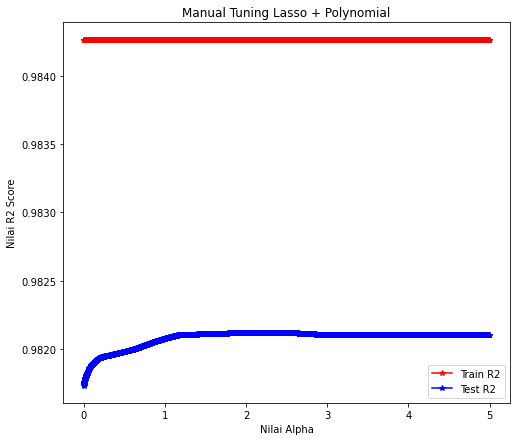

In [373]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Lasso, 'r*-')
plt.plot(Alpha, test_Lasso, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Polynomial")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

In [374]:
# melihat hasil test r
np.max(test_Lasso)

0.9821166067582806

In [375]:
# melihat paling tinggi nilai dari test ridge
Alpha[np.argmax(test_Lasso)]

2.5060000000000002

### TUNING ELATISITAS

- Tunning Elastisitas pakai parameter

In [376]:
param_ae = [0.001, 0.01, 1,2,3, 10, 50, 100]

In [377]:
## Eva Matrix yang digunakan = R2
train_e = []
test_e = []

for i in param_ae: # Melooping nilai dari pram_a
    model_l = ElasticNet(alpha=i) # Define model dengan nilai Alpha sesuai nilai i
    model_l.fit(df_XtrainPoli, y_train) # Training Model
    y_pred_tr = model_l.predict(df_XtrainPoli) # Model Predict data Training
    R2_train = r2_score(y_train, y_pred_tr) ## Evaluation Matrix Data Training
    train_e.append(R2_train) ## Memasukkan Hasil Eva Matrix Data Training ke Training List
    y_pred_ts = model_l.predict(df_XtestPoli) # Model Predict data Testing
    R2_test = r2_score(y_test, y_pred_ts) ## Evaluation Matrix Data Testing
    test_e.append(R2_test) ## Memasukkan Hasil Eva Matrix Data Testing ke Testing List

In [378]:
# melihat hasil test r
test_e

[0.9821787177367768,
 0.981728666278912,
 0.9770969471327592,
 0.9767397549679547,
 0.9766026987219004,
 0.9763917042505497,
 0.9763110127596466,
 0.9762957203443247]

In [379]:
# melihat paling tinggi nilai dari test ridge
np.max(test_e)

0.9821787177367768

In [380]:
# Melihat pada index keberapa paling tinggi 
np.argmax(test_e)

0

In [381]:
# index ke berapa letak nilai tertinggi
param_a[1]

0.01

In [382]:
# nilai tertinggi dari baris index
param_a[np.argmax(test_e)]

0.001

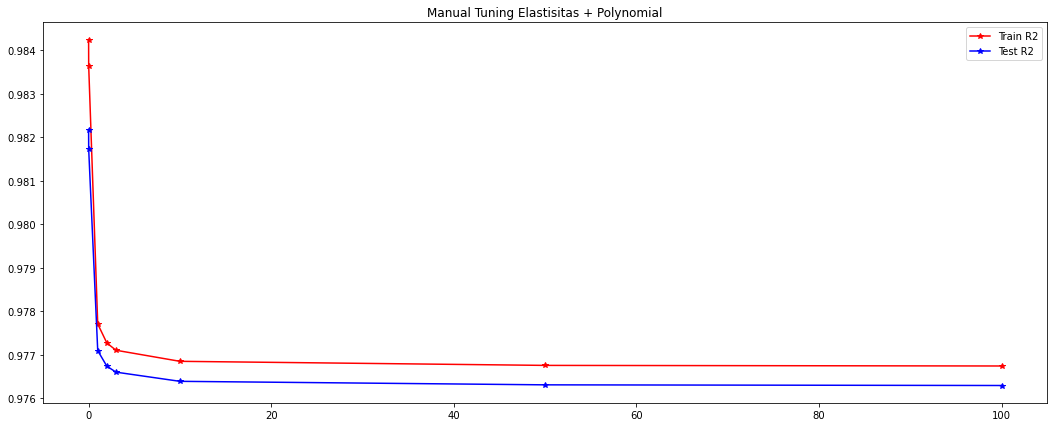

In [383]:
plt.figure(figsize=(18,7))
plt.plot(param_ae, train_e, 'r*-')
plt.plot(param_ae, test_e, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Elastisitas + Polynomial")
plt.show()

- Tunning Elastisnet pakai Alpha

In [384]:
train_Enet, test_Enet = Manual_Tune(Alpha, df_XtrainPoli, df_XtestPoli, y_train, y_test, ElasticNet)

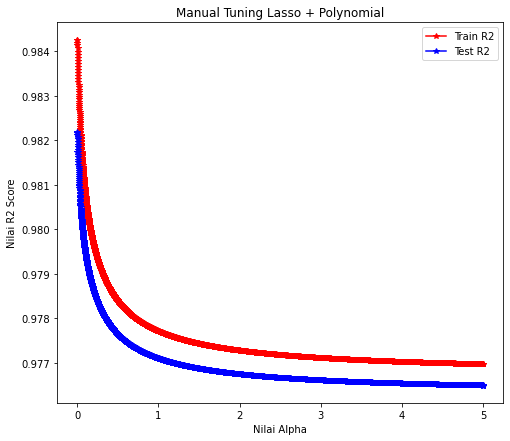

In [385]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Enet, 'r*-')
plt.plot(Alpha, test_Enet, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.title("Manual Tuning Lasso + Polynomial")
plt.xlabel("Nilai Alpha")
plt.ylabel("Nilai R2 Score")
plt.show()

In [386]:
# melihat hasil test r
test_e

[0.9821787177367768,
 0.981728666278912,
 0.9770969471327592,
 0.9767397549679547,
 0.9766026987219004,
 0.9763917042505497,
 0.9763110127596466,
 0.9762957203443247]

### MENGISI ANGKA ALPHA DI MODEL

In [387]:
print('Top EvaMatrix Test : ', np.max(test_Ridge))
print('Top Alpha :', Alpha[np.argmax(test_Ridge)])

Top EvaMatrix Test :  0.9821668002126556
Top Alpha : 2.824


In [388]:
print('Top EvaMatrix Test : ', np.max(test_l))
print('Top Alpha :', Alpha[np.argmax(test_l)])

Top EvaMatrix Test :  0.9822660134236433
Top Alpha : 0.007


In [389]:
print('Top EvaMatrix Test : ', np.max(test_Enet))
print('Top Alpha :', Alpha[np.argmax(test_Enet)])

Top EvaMatrix Test :  0.9821787177367768
Top Alpha : 0.001


# MENGISI NILAI VALUE UNTUK TUNNING

In [390]:
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [391]:
Model_R_tuned = Ridge(alpha=0.023)

In [392]:
Model_R_tuned.fit(df_XtrainPoli, y_train)

Ridge(alpha=0.023)

In [393]:
model_l_tuned = Lasso(alpha=0.007)

In [394]:
model_l_tuned.fit(df_XtrainPoli, y_train)

Lasso(alpha=0.007)

In [395]:
model_e_tuned = ElasticNet(alpha=0.054)

In [396]:
model_e_tuned.fit(df_XtrainPoli, y_train)

ElasticNet(alpha=0.054)

- Mengukur Evaluasi Matrix RIDGE setelah tuning

- - Latihan RIDGE

In [397]:
r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr = Eva_Matrix(Model_R_tuned, df_XtrainPoli, y_train)

- - Test RIDGE

In [398]:
r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts = Eva_Matrix(Model_R_tuned, df_XtestPoli, y_test)

- Mengukur Evaluasi Matrix LASSO setelah tuning

- - Latihan LASSO

In [399]:
r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr = Eva_Matrix(model_l_tuned, df_XtrainPoli, y_train)

- - Test LASSO

In [400]:
r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts = Eva_Matrix(model_l_tuned, df_XtestPoli, y_test)

- Mengukur Evaluasi Matrix ELASTISNET setelah tuning

- - Latihan ELASTISNET

In [401]:
r2_E_tr, MAE_E_tr, MSE_E_tr, RMSE_E_tr = Eva_Matrix(model_e_tuned, df_XtrainPoli, y_train)

- - Test ELASTISNET

In [402]:
r2_E_ts, MAE_E_ts, MSE_E_ts, RMSE_E_ts = Eva_Matrix(model_e_tuned, df_XtestPoli, y_test)

In [403]:
eva_data_final = {
    "Ridge Tuned Training" : [r2_R_tr, MAE_R_tr, MSE_R_tr, RMSE_R_tr],
    "Ridge Tuned Testing" : [r2_R_ts, MAE_R_ts, MSE_R_ts, RMSE_R_ts],
    "Lasso Tuned Training" : [r2_L_tr, MAE_L_tr, MSE_L_tr, RMSE_L_tr],
    "Lasso Tuned Testing" : [r2_L_ts, MAE_L_ts, MSE_L_ts, RMSE_L_ts],
    "ElasticNet Tuned Training" : [r2_E_tr, MAE_E_tr, MSE_E_tr, RMSE_E_tr],
    "ElasticNet Tuned Testing" : [r2_E_ts, MAE_E_ts, MSE_E_ts, RMSE_E_ts]
}
hasil_tuning = pd.DataFrame(eva_data_final, index=['R2', 'MAE', 'MSE', 'RMSE']).round(2)

### Sebelum Tunning

In [404]:
seluruh_kolom_final.T

R2        MAE           MSE       RMSE
LinReg Training      0.95  626264.97  6.398145e+11  799884.08
LinReg Testing       0.96  620101.44  6.373275e+11  798327.96
Polynomial Training  0.98  394354.69  2.207883e+11  469881.11
Polynomial Testing   0.98  428685.51  2.655153e+11  515281.74
Ridge Training       0.98  394550.82  2.208525e+11  469949.47
Ridge Testing        0.98  428240.89  2.647530e+11  514541.51
Lasso Training       0.98  394499.53  2.208947e+11  469994.33
Lasso Testing        0.98  429033.66  2.658633e+11  515619.29
Elast Training       0.98  458759.80  3.129547e+11  559423.54
Elast Testing        0.98  472423.05  3.396867e+11  582826.46

### Setelah Tunning

In [405]:
hasil_tuning.T

R2        MAE           MSE       RMSE
Ridge Tuned Training       0.98  394360.73  2.207883e+11  469881.14
Ridge Tuned Testing        0.98  428658.99  2.655052e+11  515271.96
Lasso Tuned Training       0.98  394485.20  2.208940e+11  469993.63
Lasso Tuned Testing        0.98  430073.78  2.706427e+11  520233.34
ElasticNet Tuned Training  0.98  421513.20  2.566757e+11  506631.72
ElasticNet Tuned Testing   0.98  446573.88  2.939752e+11  542194.76